Problem 1
Cold Storage started its operations in Jan 2016. They are in the business of storing Pasteurized Fresh
Whole or Skimmed Milk, Sweet Cream, Flavoured Milk Drinks. To ensure that there is no change of
texture, body appearance, separation of fats the optimal temperature to be maintained is between 2º - 4º
C.
In the first year of business, they outsourced the plant maintenance work to a professional company with stiff
penalty clauses. It was agreed that if it was statistically proven that the probability of temperature going
outside the 2º - 4º C during the one-year contract was above 2.5% and less than 5% then the penalty would
be 10% of AMC (annual maintenance case). In case it exceeded 5% then the penalty would be 25% of the
AMC fee. The average temperature data at the date level is given in the file
“Cold_Storage_Temp_Data_.csv”

Dataset to be used for Problem 1:
Cold_Storage_Temp_Data_.csv

In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ttest_1samp


In [122]:
df= pd.read_csv('Cold_Storage_Temp_Data.csv')
df

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5
...,...,...,...,...
360,Winter,Dec,27,2.7
361,Winter,Dec,28,2.3
362,Winter,Dec,29,2.6
363,Winter,Dec,30,2.3


In [123]:
df.columns

Index(['Season', 'Month', 'Date', 'Temperature '], dtype='object')

In [124]:
df.rename(columns={'Temperature ':'Temperature'},inplace=True)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

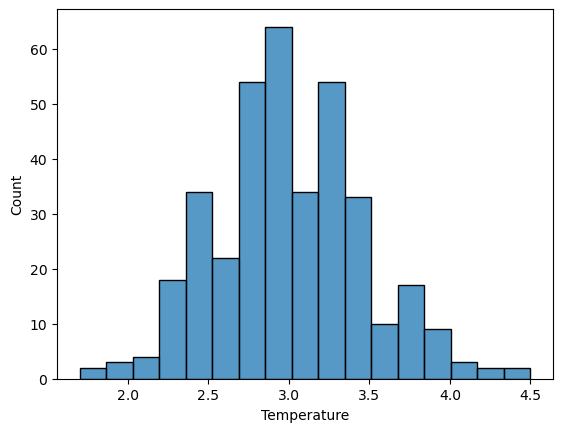

In [125]:
sns.histplot(df['Temperature'])

1. Find mean cold storage temperature for Summer, Winter, and Rainy Season. (7 marks)

In [126]:
df.groupby('Season')['Temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Rainy,122.0,3.087705,0.527207,1.7,2.70,3.05,3.4,4.5
Summer,120.0,3.147500,0.351698,2.5,2.90,3.20,3.4,4.0
Winter,123.0,2.776423,0.414310,1.8,2.45,2.80,3.0,3.9


In [127]:
df.groupby('Season')['Temperature'].mean()

Season
Rainy     3.087705
Summer    3.147500
Winter    2.776423
Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Season', ylabel='Temperature'>

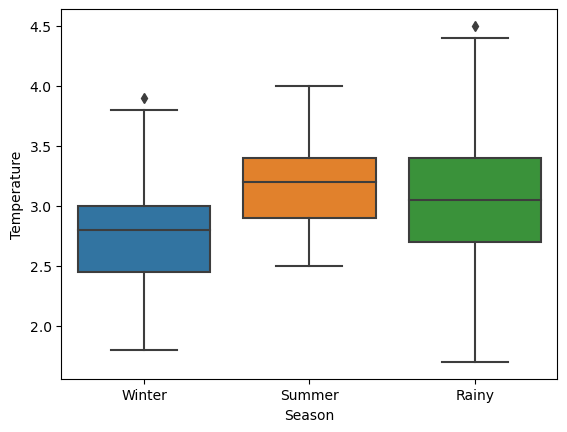

In [128]:
sns.boxplot(data=df, y= 'Temperature',x= 'Season')

2. Find the overall mean for the full year. (7 marks)

In [129]:
df.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


In [130]:
df['Temperature'].mean()

3.0024657534246577

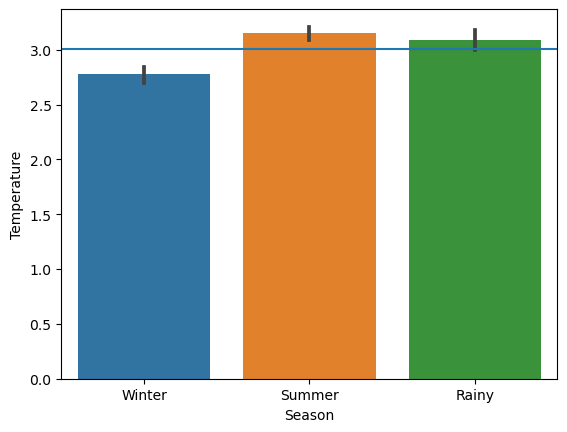

In [131]:
sns.barplot(data=df, y= 'Temperature',x= 'Season')
plt.axhline(y=df.Temperature.mean())


3. Find Standard Deviation for the full year. (7 marks)

In [132]:
df['Temperature'].std()

0.4658319416510761

In [133]:
df.groupby('Season')['Temperature'].std()

Season
Rainy     0.527207
Summer    0.351698
Winter    0.414310
Name: Temperature, dtype: float64

4. Assume Normal distribution, what is the probability of temperature having fallen below 2º C? (7 marks)

In [134]:
#calculating z value: x- mean / s.d

In [135]:
zvalue= (2- df['Temperature'].mean())/df['Temperature'].std()
zvalue

-2.1519901573764098

In [136]:
p1= sts.norm.cdf(zvalue)
p1

0.015699064791364223

In [137]:
df[df['Temperature'] < 2]

,Season,Month,Date,Temperature
203,Rainy,Jul,23,1.9
271,Rainy,Sep,29,1.7
306,Winter,Nov,3,1.8


5. Assume Normal distribution, what is the probability of temperature having gone above 4º C? (7 marks)

In [138]:
#calculating z value: x- mean / s.d

In [139]:
zvalue= (4- df['Temperature'].mean())/df['Temperature'].std()
zvalue

2.1414037067525293

In [140]:
p2= 1-sts.norm.cdf(zvalue)
p2

0.016120748141276064

In [141]:
df[df['Temperature'] > 4]

,Season,Month,Date,Temperature
190,Rainy,Jul,10,4.2
233,Rainy,Aug,22,4.3
244,Rainy,Sep,2,4.1
248,Rainy,Sep,6,4.1
250,Rainy,Sep,8,4.1
251,Rainy,Sep,9,4.5
262,Rainy,Sep,20,4.4


6. What will be the penalty for the AMC Company? (5 marks)

In [142]:
p1+p2

0.03181981293264029

In [143]:
# With 3% probability of temperature recorded below 2 or above 4 , penalty for AMC shall be 10%

Problem 2
In Mar 2018, Cold Storage started getting complaints from their clients that they have been getting complaints from
end consumers of the dairy products going sour and often smelling. On getting these complaints, the supervisor
pulls out data of the last 35 days’ temperatures. 
As a safety measure, the Supervisor has been vigilant to maintain the mean temperature 3.9º C or below.
Assume 3.9º C as the upper acceptable mean temperature and at alpha = 0.1 do you feel that there is a
need for some corrective action in the Cold Storage Plant or is it that the problem is from the procurement
side from where Cold Storage is getting the Dairy Products. The data of the last 35 days is in

Dataset to be used for Problem 2: Cold_Storage_Mar2018_.csv

In [169]:
df= pd.read_csv('Cold_Storage_Mar2018.csv')
df

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8
5,Summer,Feb,16,4.0
6,Summer,Feb,17,4.1
7,Summer,Feb,18,4.0
8,Summer,Feb,19,3.8
9,Summer,Feb,20,3.9


In [170]:
df.columns

Index(['Season', 'Month', 'Date', ' Temperature '], dtype='object')

In [171]:
df.rename(columns={' Temperature ':'Temperature'},inplace=True)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

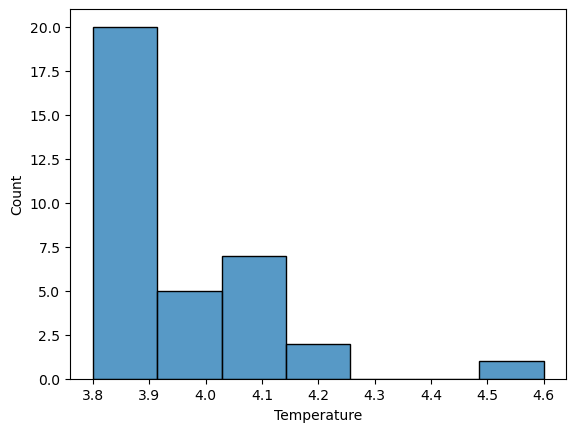

In [172]:
sns.histplot(df['Temperature'])

<AxesSubplot:xlabel='Temperature'>

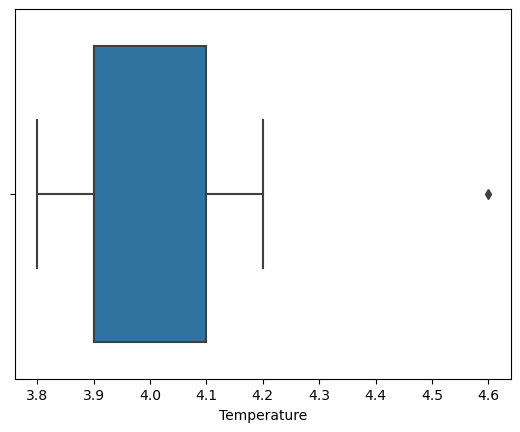

In [173]:
sns.boxplot(data=df, x= 'Temperature')

In [174]:
# 1. Which Hypothesis test shall be performed to check if corrective action is needed at the cold storage
# plant? Justify your answer. (6 marks)

In [175]:
df[df['Temperature'] > 3.9].count()[0] /df['Temperature'].sum()

0.10783608914450034

In [176]:
df[df['Temperature'] > 3.9].count()[0]

15

In [177]:
df[df['Temperature']> 3.9]

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
3,Summer,Feb,14,4.0
5,Summer,Feb,16,4.0
6,Summer,Feb,17,4.1
7,Summer,Feb,18,4.0
11,Summer,Feb,22,4.6
12,Summer,Feb,23,4.1
13,Summer,Feb,24,4.1
21,Summer,Mar,4,4.1
24,Summer,Mar,7,4.1


In [153]:
# T test can be used when there are near 30 sample size
# We can here use One tail T test.

In [156]:
# 2. State the Hypothesis and do the necessary calculations to accept or reject the corresponding null
# hypothesis. (8 marks)

In [157]:
# H0: Temperature is maintained at or below 3.9 deg C
# Ha: Temperature is higher than 3.9 deg C

In [180]:
Zstatic, pvalue = sts.ttest_1samp(df['Temperature'], popmean = 3.9,alternative ='greater')
Zstatic, pvalue    

(2.7484935632942546, 0.004815626145896391)

In [83]:
# pvalue is LESS than alpha 0.01 , so we REJECT H0 hypothesis. So, temperature is not maintained at or below 3.9 deg C.
# And Cold Storage Plant will need corrective action.

2.752358609800241

In [ ]:
3. Give your inference. (6 marks)

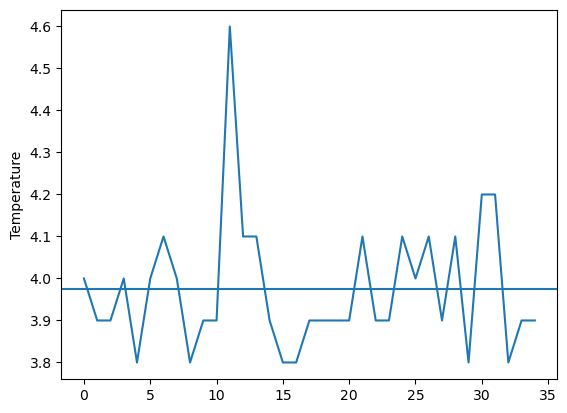

In [161]:
sns.lineplot(data= df, x = df.index, y = df.Temperature)
plt.axhline(df.Temperature.mean())

In [85]:
df['Temperature'].mean()

3.974285714285715

In [86]:
df['Temperature'].describe()

count    35.000000
mean      3.974286
std       0.159674
min       3.800000
25%       3.900000
50%       3.900000
75%       4.100000
max       4.600000
Name: Temperature, dtype: float64

In [88]:
zvalue= (3.9- df['Temperature'].mean())/df['Temperature'].std()
zvalue

-0.4652335179222677

In [90]:
prob= 1-sts.norm.cdf(zvalue)
prob

0.6791178808972307

In [178]:
#removing outlier row 11
df.drop(index=11,inplace=True)

In [179]:
zvalue= (3.9- df['Temperature'].mean())/df['Temperature'].std()
zvalue
prob= 1-sts.norm.cdf(zvalue)
prob

0.6813091466473861